# Overwatch Game Records Analysis
Team Name: 3edgy5u

Team Members:

#### Berkay Çınar - 201511013

#### Celal Şahin - 201411056

#### Onur Ata Sarıtaş - 201511049

# Explanation of Project and Terms

We will focus on analyzing the overwatch game records from https://www.kaggle.com/simonho87/overwatch-ranked-data#season9.csv based on season 9 of the game. We collected raw csv data from kaggle.
We will analyze various statistics from matches to show that every stat could effect the outcome of the match. First, we will import the necessary libraries. Then, we will preprocess the data and visualize it.

## Some attributes are explained below:

####  StartSR, EndSR, etc. -- SR:
Points used in the game which denote the player's rank according to his/her skills. Higher is better.

#### TeamStack, EnemyStack:
Stack means that how many acquianted players enters the match together. Example, if TeamStack is 2, then you and one player you know enters together to the match.

#### Role:
Character you are playing

#### Dmg:
How much damage you have been dealt

## 1. Importing Necessary Libraries

In [10]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Reading File

Making sure that dataset is working

In [11]:
ow_raw = pd.read_csv("season9.csv")
ow_raw.head(5)

,Game #,Start SR,End SR,SR Change,Team SR avg,Enemy SR avg,Team Stack,Enemy Stack,Role 1,Role 2,...,Obj_time_career,Obj_time_medal,Dmg,Dmg_career,Dmg_medal,Heal,Heal_career,Heal_medal,Death,Death_career
0,108,1806,1787,-19,1831,P,NaN,NaN,Support,NaN,...,01:32,NaN,10615.0,5435.0,NaN,9711.0,7844.0,NaN,13.0,6.65
1,109,1787,1787,0,1836,1847,NaN,NaN,Offense,Support,...,01:27,NaN,5973.0,5246.0,NaN,1958.0,6651.0,NaN,6.0,6.97
2,110,1787,1812,25,1817,1818,NaN,NaN,Tank,NaN,...,01:27,Bronze,6959.0,5257.0,Silver,0.0,6594.0,None,5.0,6.95
3,111,1812,1841,29,1827,1839,NaN,NaN,Support,NaN,...,01:32,None,5601.0,5448.0,None,10719.0,7851.0,Gold,8.0,6.64
4,112,1841,1866,25,1900,1891,4.0,3.0,Tank,Support,...,01:27,None,2658.0,5251.0,None,2330.0,6608.0,Silver,5.0,6.96


Datatypes of the attributes

In [12]:
ow_raw.dtypes

Game #                int64
Start SR              int64
End SR                int64
SR Change             int64
Team SR avg          object
Enemy SR avg         object
Team Stack          float64
Enemy Stack         float64
Role 1               object
Role 2               object
Result               object
Streak                int64
Leaver               object
Map                  object
Match Time           object
Elim                float64
Elim_career         float64
Elim_medal           object
Obj_kills           float64
Obj_kills_career    float64
Obj_kills_medal      object
Obj_time             object
Obj_time_career      object
Obj_time_medal       object
Dmg                 float64
Dmg_career          float64
Dmg_medal            object
Heal                float64
Heal_career         float64
Heal_medal           object
Death               float64
Death_career        float64
dtype: object

## 3. Preprocessing the Data (Cleaning)

Checking the shape and attributes of the dataset

In [13]:
ow_raw.index

RangeIndex(start=0, stop=207, step=1)

In [14]:
ow_raw.shape

(207, 32)

Checking the sum of null values in attributes

In [15]:
ow_raw.isnull().sum()

Game #                0
Start SR              0
End SR                0
SR Change             0
Team SR avg           0
Enemy SR avg          0
Team Stack            4
Enemy Stack           4
Role 1                0
Role 2              167
Result                0
Streak                0
Leaver                0
Map                   0
Match Time            2
Elim                  2
Elim_career           2
Elim_medal            2
Obj_kills             2
Obj_kills_career      2
Obj_kills_medal       3
Obj_time              2
Obj_time_career       2
Obj_time_medal        3
Dmg                   2
Dmg_career            2
Dmg_medal             3
Heal                  1
Heal_career           4
Heal_medal            3
Death                 2
Death_career          2
dtype: int64

Backup of raw data if everything goes wrong

In [16]:
ow_bk = ow_raw

Deleting datapoints which lack necessary data. Since Team Stack and Heal career attributes are likely not null in other datapoints, deleting null values in these attributes will help dealing with null values in all attributes in this data. 

In [17]:
ow_denull = ow_raw[ow_raw['Team Stack'].isnull() == False]
ow_denull = ow_denull[ow_denull['Heal_career'].isnull() == False]

Role2 being none has no effect on the game. Role 2 is the secondary role of the played character in one match, therefore it's not a necessary attribute in terms of analysing different statistics about game dynamics.

In [18]:
ow_denull.isnull().sum()

Game #                0
Start SR              0
End SR                0
SR Change             0
Team SR avg           0
Enemy SR avg          0
Team Stack            0
Enemy Stack           0
Role 1                0
Role 2              160
Result                0
Streak                0
Leaver                0
Map                   0
Match Time            0
Elim                  0
Elim_career           0
Elim_medal            0
Obj_kills             0
Obj_kills_career      0
Obj_kills_medal       0
Obj_time              0
Obj_time_career       0
Obj_time_medal        0
Dmg                   0
Dmg_career            0
Dmg_medal             0
Heal                  0
Heal_career           0
Heal_medal            0
Death                 0
Death_career          0
dtype: int64

Updated shape of the dataset

In [60]:
ow_denull.shape

(199, 32)

Overall description of the dataset

In [61]:
ow_denull.describe()

,Game #,Start SR,End SR,SR Change,Team Stack,Enemy Stack,Streak,Elim,Elim_career,Obj_kills,Obj_kills_career,Dmg,Dmg_career,Heal,Heal_career,Death,Death_career
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,213.160804,2306.432161,2309.381910,2.949749,1.939698,2.025126,0.452261,20.025126,18.431256,12.075377,10.950402,5911.236181,5000.348191,7160.160804,6404.832211,9.231156,7.069095
std,58.077832,119.426932,115.773354,23.556240,0.935486,0.961045,2.400859,11.083447,2.698562,7.522313,1.587695,2949.720802,632.724182,5722.786471,1873.091622,4.043555,0.442251
min,112.000000,1841.000000,1866.000000,-29.000000,1.000000,1.000000,-4.000000,1.000000,0.570000,0.000000,0.140000,180.000000,85.290000,0.000000,0.000000,0.000000,5.720000
25%,163.500000,2245.000000,2245.500000,-22.000000,1.000000,1.000000,-1.000000,12.000000,17.570000,6.000000,10.310000,3763.500000,4919.500000,905.000000,6071.500000,7.000000,6.945000
50%,213.000000,2313.000000,2316.000000,20.000000,2.000000,2.000000,1.000000,20.000000,18.390000,11.000000,10.800000,5795.000000,5075.000000,7255.000000,6244.000000,9.000000,7.060000
75%,262.500000,2392.500000,2395.500000,25.000000,2.000000,2.000000,2.000000,28.000000,19.610000,17.000000,11.520000,7516.000000,5200.000000,10955.500000,7934.500000,12.000000,7.200000
max,314.000000,2503.000000,2503.000000,35.000000,5.000000,6.000000,9.000000,60.000000,22.350000,38.000000,13.310000,16860.000000,8099.000000,21158.000000,9690.000000,23.000000,9.410000


Replacing : with a . in terms of use the values in plots and such. This codeblock helps us converting these values to float numbers.

In [62]:
ow_denull = ow_denull[ow_denull['Team SR avg'] != 'P']
ow_denull = ow_denull[ow_denull['Enemy SR avg'] != 'P']
ow_denull['Match Time'] = ow_denull['Match Time'].str.replace(':', '.').astype(float)
ow_denull['Team SR avg'] = ow_denull['Team SR avg'].astype(float)
ow_denull['Enemy SR avg'] = ow_denull['Enemy SR avg'].astype(float)

Here's the length of last 20 games played.

In [20]:
ow_denull['Match Time'].tail(20)

187    11:59
188    10:07
189    13:45
190    07:21
191    18:34
192    05:33
193    05:12
194    13:03
195    05:37
196    09:34
197    17:01
198    10:46
199    12:09
200    12:16
201    15:20
202    10:03
203    16:46
204    16:39
205    05:12
206    08:31
Name: Match Time, dtype: object

## 4. Statistics

Bringing the Games Won by the Player

In [65]:
ow_won = ow_denull[ow_denull['Result']=='Win']
ow_won.head(10)

,Game #,Start SR,End SR,SR Change,Team SR avg,Enemy SR avg,Team Stack,Enemy Stack,Role 1,Role 2,...,Obj_time_career,Obj_time_medal,Dmg,Dmg_career,Dmg_medal,Heal,Heal_career,Heal_medal,Death,Death_career
4,112,1841,1866,25,1900.0,1891.0,4.0,3.0,Tank,Support,...,01:27,None,2658.0,5251.0,None,2330.0,6608.0,Silver,5.0,6.96
5,113,1866,1901,35,1891.0,1896.0,1.0,1.0,Support,NaN,...,01:33,Gold,6324.0,5460.0,Bronze,9635.0,7888.0,Gold,4.0,6.61
7,115,1926,1958,32,1943.0,1949.0,1.0,1.0,Support,NaN,...,01:33,Gold,5871.0,5453.0,None,10761.0,7902.0,Gold,5.0,6.58
9,117,1937,1968,31,1945.0,1960.0,3.0,2.0,Support,NaN,...,01:33,Bronze,5678.0,5454.0,Bronze,8491.0,7909.0,Gold,5.0,6.55
10,118,1968,1996,28,1982.0,2012.0,2.0,1.0,Support,NaN,...,01:34,None,6096.0,5450.0,None,9919.0,7915.0,Gold,9.0,6.57
11,119,1996,2023,27,2004.0,2004.0,2.0,2.0,Support,NaN,...,01:34,Silver,6200.0,5446.0,None,10821.0,7928.0,Gold,7.0,6.56
13,121,2003,2030,27,2000.0,1992.0,1.0,1.0,Support,NaN,...,01:48,Silver,5463.0,3525.0,None,9203.0,8201.0,Silver,9.0,7.98
14,122,2030,2054,24,2002.0,2012.0,2.0,2.0,Tank,NaN,...,01:30,Bronze,7647.0,5253.0,None,0.0,6613.0,None,13.0,6.92
15,123,2054,2081,27,2051.0,2066.0,1.0,2.0,Support,NaN,...,01:35,Gold,4361.0,5452.0,None,5802.0,7941.0,Gold,2.0,6.51
16,124,2081,2110,29,2060.0,2028.0,4.0,4.0,Support,NaN,...,01:30,Gold,7258.0,5258.0,Bronze,10287.0,6629.0,Silver,7.0,6.88


Showing that dealing damage is not everything: high damage output but there are 19 lost games. Example is below.

In [66]:
ow_hidmg = ow_denull[ow_denull['Dmg']>7500]
ow_yetlost = ow_hidmg[ow_hidmg['Result']=='Loss']
ow_yetlost['Game #'].count()

18

Winrate of the player who plays solo:

In [67]:
ow_sologame = ow_denull[ow_denull['Team Stack'] < 2]
winsolo = 0
solocnt = 0
for x in ow_sologame['Result']:
    if x == 'Win':
        winsolo = winsolo + 1
    solocnt = solocnt + 1
print(winsolo/solocnt)

0.5492957746478874


Let's see if enemies playing as groups have impact on the win rate

In [68]:
ow_enemygrp = ow_denull[ow_denull['Enemy Stack'] >= 2]
winenemygrp = 0
engrpcnt = 0
for x in ow_enemygrp['Result']:
    if x == 'Win':
        winenemygrp = winenemygrp + 1
    engrpcnt = engrpcnt + 1
print(winenemygrp/engrpcnt)

0.5968992248062015


Winrate of the player who plays with one or multiple friends:

In [69]:
ow_notsologame = ow_denull[ow_denull['Team Stack'] >= 2]
wingrp = 0
grpcnt = 0
for x in ow_notsologame['Result']:
    if x == 'Win':
        wingrp = wingrp + 1
    grpcnt = grpcnt + 1
print(wingrp/grpcnt)

0.5431034482758621


Creating a new DataFrame of the games won and lost by the player and printing several attributes such as the number of outcomes.

In [71]:
ow_won = ow_denull[ow_denull['Result']=='Win']
ow_lost = ow_denull[ow_denull['Result']=='Loss']
ow_won.head(10)
print(ow_won['Game #'].count())
print(ow_lost['Game #'].count())
print((ow_won['Game #']).count()/(ow_denull['Game #'].count()))

102
82
0.5454545454545454


Inserting a column which is a simplified version of Result. If match has won, then value is 1 or reverse with value 0.

In [72]:
list = []
for x in ow_denull.Result:
    if x == 'Win':
        list.append(1)
    else:
        list.append(0)
ow_denull.insert(32,'Result_Value',list)

Showing correlations of some important values. This will give brief information about that attributes relations.

In [73]:
print(ow_denull[['Team Stack','Result_Value']].corr())
print('\n')
print(ow_denull[['Enemy Stack','Result_Value']].corr())
print('\n')
print(ow_denull[['Dmg','Result_Value']].corr())
print('\n')
print(ow_denull[['Heal','Result_Value']].corr())
print('\n')
print(ow_denull[['Streak','SR Change']].corr())

              Team Stack  Result_Value
Team Stack      1.000000     -0.019276
Result_Value   -0.019276      1.000000


              Enemy Stack  Result_Value
Enemy Stack      1.000000      0.083923
Result_Value     0.083923      1.000000


                   Dmg  Result_Value
Dmg           1.000000      0.084024
Result_Value  0.084024      1.000000


                  Heal  Result_Value
Heal          1.000000      0.072615
Result_Value  0.072615      1.000000


             Streak  SR Change
Streak     1.000000   0.843756
SR Change  0.843756   1.000000


## 5. Visualization

Visualization of the win-lose record including all matches by pie graph

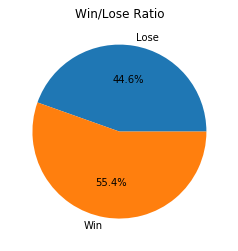

In [74]:
winrate = [ow_lost['Game #'].count(),ow_won['Game #'].count()]
wrpie = plt.pie(winrate, labels = ['Lose', 'Win'], autopct ='%1.1f%%')
plt.title('Win/Lose Ratio')
piewl = plt.gcf()

Visualizing impact of the match time to the damage. According to the graph, when match time is higher, damage been dealt is higher

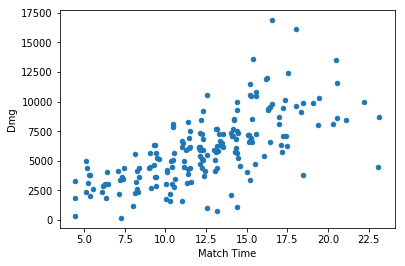

In [75]:
ow_denull.plot.scatter(x='Match Time', y='Dmg')

Graph of the team stack in all games

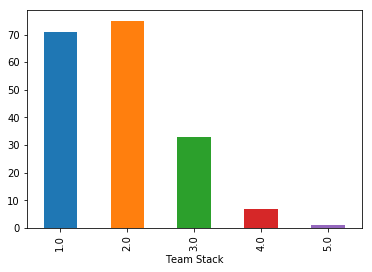

In [76]:
ow_denull.groupby('Team Stack').size().plot.bar()

Graph of the enemy stack in all games

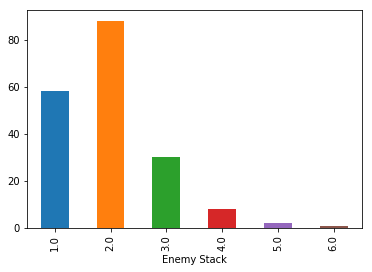

In [77]:
ow_denull.groupby('Enemy Stack').size().plot.bar()

Graph of SR Change in all games. SR Change is the Start SR minus End SR.

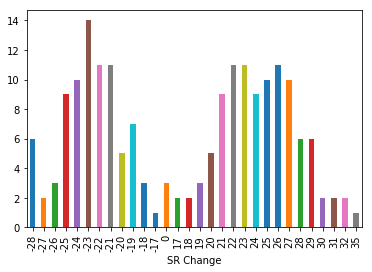

In [78]:
ow_denull.groupby('SR Change').size().plot(kind='bar')

Graph of the role distribution of the player

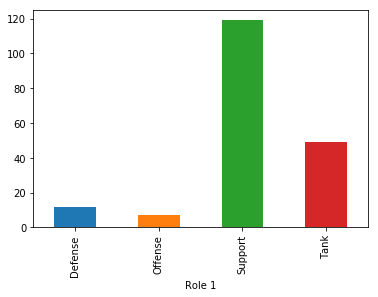

In [82]:
ow_denull.groupby('Role 1').size().plot(kind='bar')

Visualization of whether elimination/death ratio impacts on the SR Change

Note: 0 deaths with eliminations is considered as "perfect ratio", in this code block, we converted 0 deaths to 1 death in terms of avoiding from the ZeroDivisionError exception.

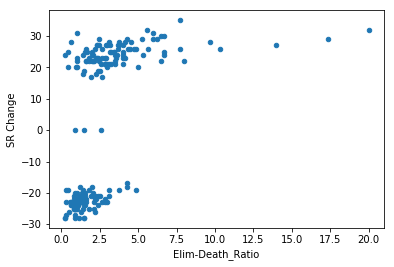

In [100]:
liste = []
listd = []
list_ratio = []
for x in ow_denull['Elim'].values:
    liste.append(x)
for y in ow_denull['Death'].values:
    listd.append(y)
for a, b in zip(liste, listd):
    if b == 0: b = 1
    list_ratio.append(float(float(a) / float(b)))
ow_denull.insert(33,'Elim-Death_Ratio',list_ratio)
ow_denull.plot.scatter(x='Elim-Death_Ratio', y='SR Change')

Defining plot function to use attributes in the y axis of graphs.

In [121]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(20,10))
    ow_denull.groupby(group)[column].sum().sort_index().plot(plot)

Graph of eliminations and their corresponding damage in matches. In this table we can see that dealing more damage has not so much effect on the elimination count.

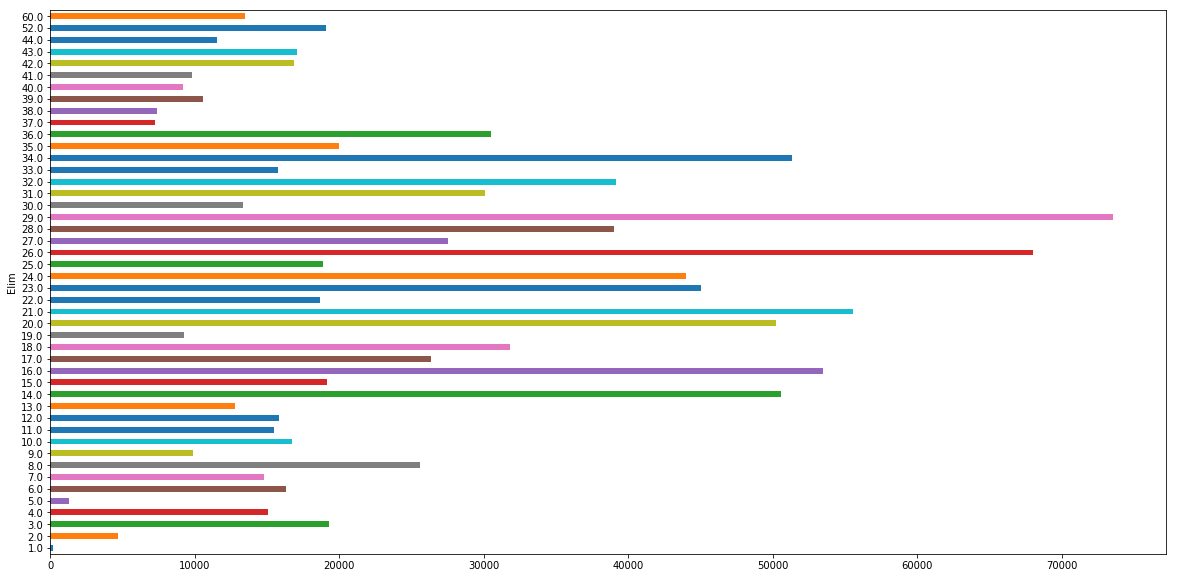

In [123]:
plot('Elim','Dmg','barh')

Heatmap of the dataset.

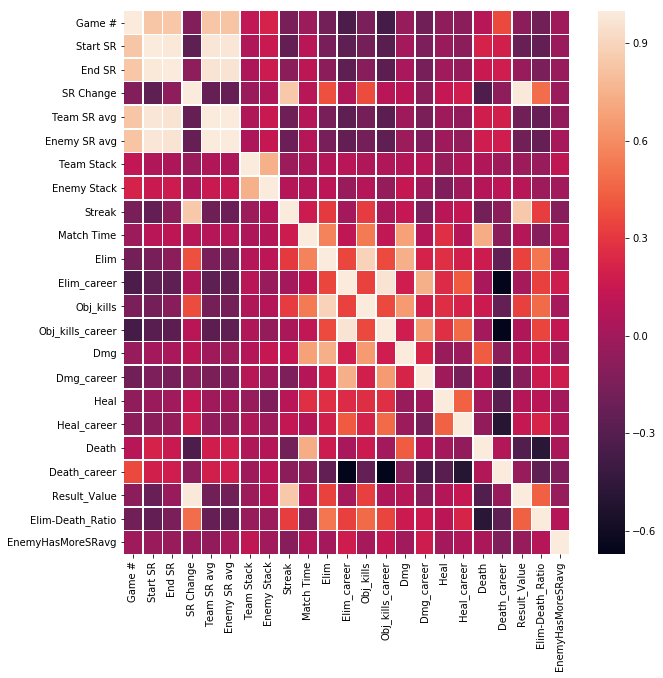

In [136]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(ow_denull.corr(), linewidths=0.5)